In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [9]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
churnData['TotalCharges'] = np.nan_to_num(churnData['TotalCharges'])

In [29]:
y = churnData['Churn']
X = churnData.drop(columns=['Churn'])

X_numeric = X._get_numeric_data()
X_categorical = X.drop(columns=X_numeric.columns)
X_categorical = pd.get_dummies(data=X_categorical, drop_first=True)

X = pd.concat(objs=[X_numeric,X_categorical], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
dt = DecisionTreeClassifier(max_depth=3)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 6607 to 860
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         5282 non-null   int64  
 1   tenure                                5282 non-null   int64  
 2   MonthlyCharges                        5282 non-null   float64
 3   TotalCharges                          5282 non-null   float64
 4   gender_Male                           5282 non-null   uint8  
 5   Partner_Yes                           5282 non-null   uint8  
 6   Dependents_Yes                        5282 non-null   uint8  
 7   PhoneService_Yes                      5282 non-null   uint8  
 8   OnlineSecurity_No internet service    5282 non-null   uint8  
 9   OnlineSecurity_Yes                    5282 non-null   uint8  
 10  OnlineBackup_No internet service      5282 non-null   uint8  
 11  OnlineBackup_Ye

In [33]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

In [37]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})

,Error_metric,Train,Test
0,Accuracy,0.786255,0.778535
1,Precision,0.671035,0.667925
2,Recall,0.368345,0.369520


Confusion matrix for the train set
[[3641  878]
 [ 251  512]]


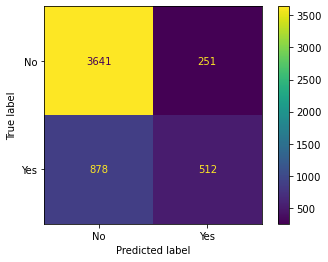



Confusion matrix for the test set
[[1194  302]
 [  88  177]]


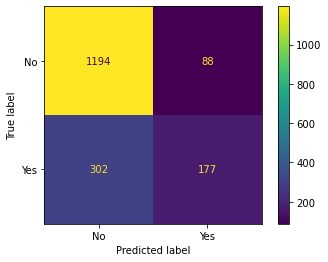

In [38]:
display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

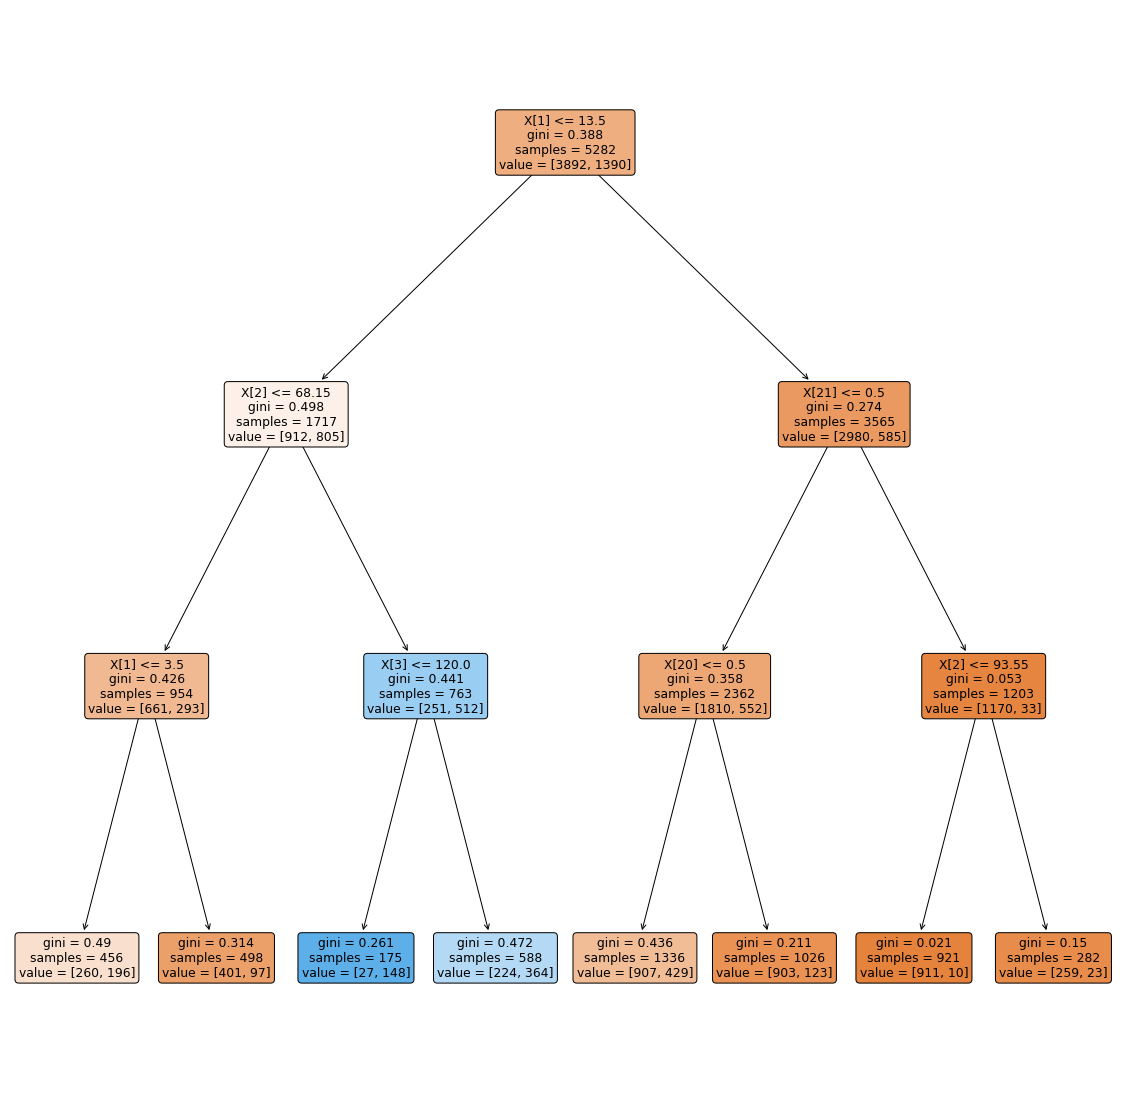

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 